1. Importação de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')

2. Carregamento da base de dados (histórico de projetos)

In [2]:
df = pd.read_csv('../data/historico_projetos.csv')
df.head()

,id_usuario,nome_usuario,projeto_id,orcamento,duracao,sucesso,data_inicio,complexidade,nota_cliente,idade,projetos_concluidos,horas_trabalhadas,nivel_experiencia
0,1,Usuário 1,1_1,9666,10,1,2021-11-30,3,2.529848,52,12,31,5
1,1,Usuário 1,1_2,2267,3,0,2021-10-08,5,2.801997,52,12,31,5
2,1,Usuário 1,1_3,11627,14,0,2022-02-15,2,1.390688,52,12,31,5
3,1,Usuário 1,1_4,16787,8,1,2020-07-24,1,2.035120,52,12,31,5
4,1,Usuário 1,1_5,4943,4,1,2021-01-24,2,3.270801,52,12,31,5


3. Verificação geral da base de histórico de projetos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_usuario           353 non-null    int64  
 1   nome_usuario         353 non-null    object 
 2   projeto_id           353 non-null    object 
 3   orcamento            353 non-null    int64  
 4   duracao              353 non-null    int64  
 5   sucesso              353 non-null    int64  
 6   data_inicio          353 non-null    object 
 7   complexidade         353 non-null    int64  
 8   nota_cliente         353 non-null    float64
 9   idade                353 non-null    int64  
 10  projetos_concluidos  353 non-null    int64  
 11  horas_trabalhadas    353 non-null    int64  
 12  nivel_experiencia    353 non-null    int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 36.0+ KB


4. Estatísticas descritivas da base de histórico de projetos

In [5]:
# Estatísticas descritivas apenas das variáveis numéricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'id_usuario' in num_cols:
    num_cols.remove('id_usuario')
df[num_cols].describe()

,orcamento,duracao,sucesso,complexidade,nota_cliente,idade,projetos_concluidos,horas_trabalhadas,nivel_experiencia
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,10359.096317,12.368272,0.691218,3.059490,2.986722,38.660057,9.623229,38.441926,2.977337
std,5242.442940,6.616982,0.462647,1.449677,1.171722,11.492489,5.130371,11.702401,1.441884
min,1013.000000,1.000000,0.000000,1.000000,1.009358,20.000000,1.000000,10.000000,1.000000
25%,5895.000000,6.000000,0.000000,2.000000,1.994897,31.000000,5.000000,30.000000,2.000000
50%,10105.000000,13.000000,1.000000,3.000000,2.957700,39.000000,8.000000,40.000000,3.000000
75%,14550.000000,18.000000,1.000000,4.000000,4.043140,48.000000,14.000000,49.000000,4.000000
max,19888.000000,23.000000,1.000000,5.000000,4.979631,59.000000,19.000000,56.000000,5.000000


5. Distribuição da variável alvo (sucesso) na base de histórico de projetos

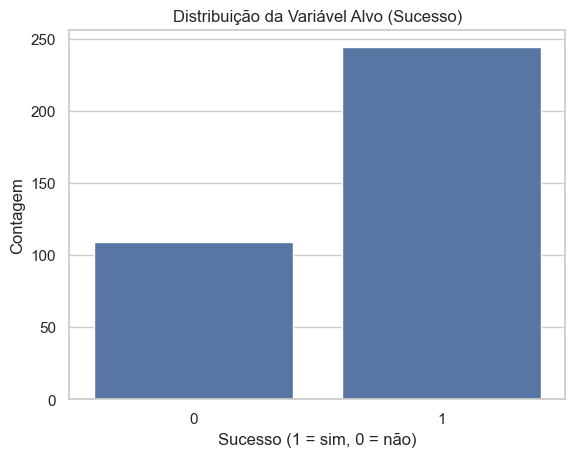

In [6]:
sns.countplot(x='sucesso', data=df)
plt.title('Distribuição da Variável Alvo (Sucesso)')
plt.xlabel('Sucesso (1 = sim, 0 = não)')
plt.ylabel('Contagem')
plt.show()

6. Correlação entre variáveis numéricas da base de histórico de projetos

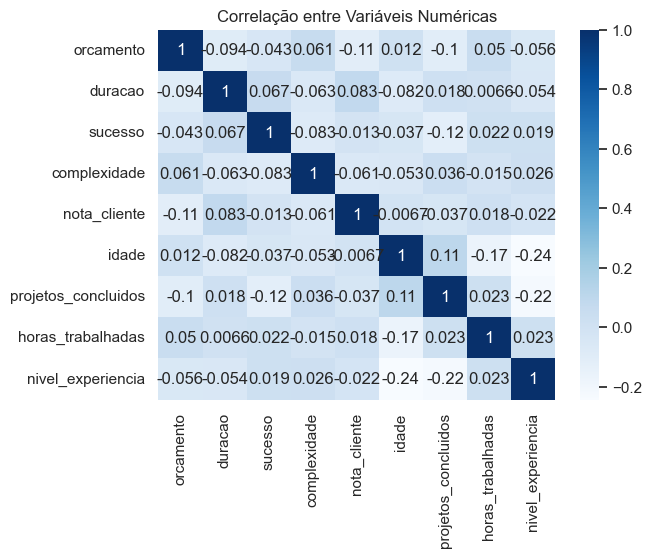

In [7]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'id_usuario' in num_cols:
    num_cols.remove('id_usuario')
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

7. Conversão de variáveis categóricas relevantes (se houver)

In [8]:
# Exemplo: se houver coluna 'nome_usuario', converter para categoria
if 'nome_usuario' in df.columns:
    df['nome_usuario'] = df['nome_usuario'].astype('category')
df.head()

,id_usuario,nome_usuario,projeto_id,orcamento,duracao,sucesso,data_inicio,complexidade,nota_cliente,idade,projetos_concluidos,horas_trabalhadas,nivel_experiencia
0,1,Usuário 1,1_1,9666,10,1,2021-11-30,3,2.529848,52,12,31,5
1,1,Usuário 1,1_2,2267,3,0,2021-10-08,5,2.801997,52,12,31,5
2,1,Usuário 1,1_3,11627,14,0,2022-02-15,2,1.390688,52,12,31,5
3,1,Usuário 1,1_4,16787,8,1,2020-07-24,1,2.035120,52,12,31,5
4,1,Usuário 1,1_5,4943,4,1,2021-01-24,2,3.270801,52,12,31,5


8. Visualização combinada (pairplot) de variáveis relevantes da base de histórico de projetos

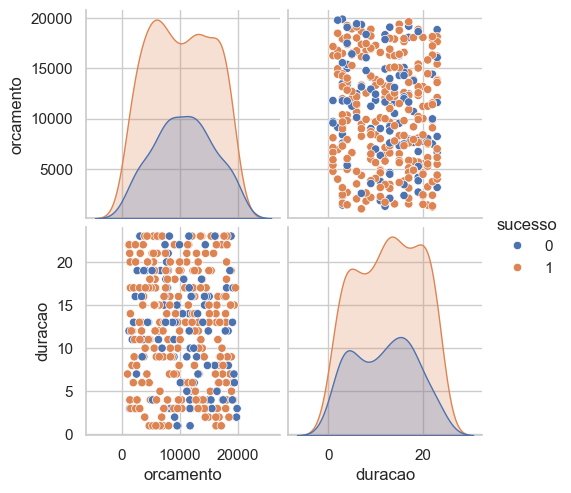

In [9]:
sns.pairplot(df, hue='sucesso', vars=['orcamento', 'duracao'])
plt.show()